<h1> kMeans and k Nearest Neighbours</h1>

This week, we are going to learn about and implement two loosely related machine-learning algorithms. In this lab, we'll help you to implement the *kMeans* algorithm, and then for your consolidation exercise, you'll work in pairs to implement *k Nearest Neighbours* (kNN). In both cases, you should try to not only write code that is correct, but also ensure your code is readable. The best way to do this is to stick to the unit style guide (available on Blackboard).

<h2> kMeans</h2>

Before we dive in to code, we need to introduce some background ideas so we can understand what kMeans is trying to do and why we'd want to use it. kMeans is an *unsupervised* *clustering* algorithm. A *clustering* algorithm tries to organise some data points into groups (or *clusters* based on the values of the data points. 

<img src="https://github.com/engmaths/SEMT10002_2024/blob/main/img/cluster_example.png?raw=true" width="80%">

A *supervised* clustering algorithm would do this by training a model on data which contains the *true* cluster allocations. For example, you may want to use a clustering algorithm to identify which students are most likely to fail a unit based on their engagement with formative assessments. To do this, we'd need some data consisting of the student's engagement record and whether they passed or failed the unit. In many cases, however, we don't have access to (or simply don't know) the true allocations. In these cases, we have to use an unsupervised algorithm, which tries to infer the allocations based on other properties of the data. kMeans is an example of such an algorithm. 

<h3> How it works</h3>

The basic idea behind kMeans is to try to assign a data point to the cluster which it is *closest* too. It does this by calculating the mean (hence kMeans) of all data points assigned to a cluster. Once the means have been calculated, the algorithm loops through each data point, calculating the distance to each cluster mean and re-assigning points to the cluster it is closest too. 

The algorithm described in the paragraph above suffers from a 'chicken and egg' problem. In order to calculate the mean of a cluster, we need to have assigned each of our data points to a cluster already. But we can't assign a point to a cluster if we don't know where the mean is-- so how do we get started? 

Well, it turns out that we can start with *random* means for our clusters and then repeat a process of first assigning points to the (random) clusters and then re-calculating the mean points. Over time, we'll see that often (but not always!), the number of points which change cluster reduces, until eventually the algorithm converges (i.e. we do an update and no points are re-assigned to different clusters). Convergence isn't guaranteed with kMeans, so it's a good idea to set an upper limit on the number of iterations we want to run.

As a sequence of steps, we can write this down as:

1. Decide how many clusters we want (i.e. what value of K should we use). 
2. Randomly initialise K cluster means
3. Repeat until convergence
   
    a. Assign each data point to the cluster it is closest to
   
    b. Re-calculate the mean position of each cluster.

To calculate distance, kMeans use the *Euclidean distance* metric. If you haven't heard of this before, the idea is that if we have two points we can draw a triangle between them, formed by the hypotenuse (i.e. the distance between the points), the horizontal separation, and the vertical separation. The horizontal ($x_2 - x_1$) and vertical ($y_2 - y_1$) separations can be calculated directly from our data points. The distance can then be calculated using Pythagoras theorem- $d = \sqrt{(x_2-x_1)^2 + (y_2-y_1)^2}$

<img src="https://github.com/engmaths/SEMT10002_2024/blob/main/img/euclidean_distance.png?raw=true" width="80%">

This is the situation for when we have 2D data- if our data was 3D, then we would simply modify the equation to include an additional *separation* term (i.e $z_2-z_1)$. In fact, the same equation can work for any number of dimensions. This is good, because data points in machine learning are often very highly dimensional!

Let's see what happens when we run kMeans on the data plotted above. We start by choosing 3 random data points to be our initial cluster means (shown by the '+' in our plot).

<img src="https://github.com/engmaths/SEMT10002_2024/blob/main/img/step1.png?raw=true" width="80%">

Next, we assign each data point to the cluster it is closest to.

<img src="https://github.com/engmaths/SEMT10002_2024/blob/main/img/step2.png?raw=true" width="80%">

Next, we update our cluster means

<img src="https://github.com/engmaths/SEMT10002_2024/blob/main/img/step3.png?raw=true" width="80%">

Then we re-assign each data point to the closest cluster

<img src="https://github.com/engmaths/SEMT10002_2024/blob/main/img/step4.png?raw=true" width="80%">

and again update our cluster means

<img src="https://github.com/engmaths/SEMT10002_2024/blob/main/img/step5.png?raw=true" width="80%">

After two more iterations we converge on a solution

<img src="https://github.com/engmaths/SEMT10002_2024/blob/main/img/step6.png?raw=true" width="80%">
<img src="https://github.com/engmaths/SEMT10002_2024/blob/main/img/step7.png?raw=true" width="80%">
<img src="https://github.com/engmaths/SEMT10002_2024/blob/main/img/step8.png?raw=true" width="80%">



<h3> Implementing kMeans</h3>

Before we can start implementing kMeans, we need a data set to apply it to. The file "heart_data.csv" contains data from 297 patients who suffered from heart failure. We'd like to run kMeans on this data to see how many different underlying causes led to heart failure. Our data set contains 13 bits of information (or *feature* as we normally call them in machine learning) about each patient. We'll begin by just looking at two- the patient's age and the results of a test for the presence of creatanine phosphokinase. 

**Exercise 1**

Download the file "heart_data.csv" and write some code for reading the contents of the file. You should store the data as a single numpy array of size (2, 297). Then create a scatter plot of age against creatanine phosphokinase. Your plot should look like the image below. 

<img src="https://github.com/engmaths/SEMT10002_2024/blob/main/img/heart_data_plot.png?raw=true" width="80%">

(2, 299)


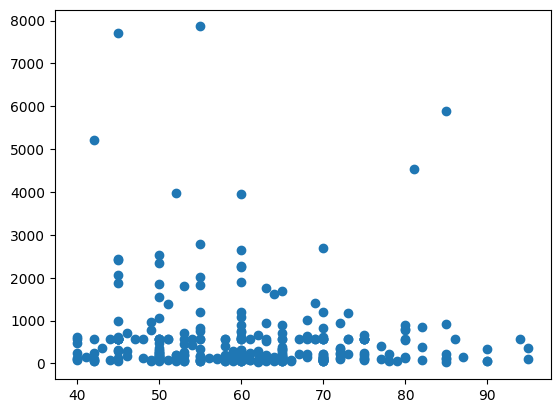

In [89]:
import numpy as np 
import matplotlib.pyplot as plt 

file = "heart_data.csv"

#Your code goes here

with open(file, 'r') as f:

    creatinine_phosphokinase = []
    age = []

    data = f.readlines()

    for i in range(1,len(data)):
        data[i] = data[i].split(',')
        
        age.append(float(data[i][0]))
        creatinine_phosphokinase.append(float(data[i][2]))


#Store the data as a 2 x 297 numpy array.
data = np.array([age, creatinine_phosphokinase])

plt.scatter(data[0], data[1])

print(data.shape)

Now that we've got some data to process, we can start working on our function for implementing kMeans. At the highest level, this code should will look like:

Here, we've got four functions that we need to define in order for this code to work. Let's implement each in turn.

<h4>Initialising centroids</h4>

We need to randomly choose some starting centroid means. A simple way to do this is to  randomly select K points and use their position at the cluster means. We can do this by randomly generating K integers between 0 and the size of our data set and using these to index into the data array.

**Exercise 2**
Complete the function below to randomly initalise the centroids.

In [94]:
def initialise_centroids(k, data):

    #Centroids should be a list of k points, where each point is a tuple (feature1, feature2).
    centroids = []

    for i in range(k):
        #We randomly select a point from our data to be our centroid
        centroid = tuple(data[:, np.random.randint(data.shape[1])])
        centroids.append(centroid)

    return centroids

[ -59. -234.]


<h4> Assigning Data to Clusters</h4>

To assign a data point to a cluster, we need to find which cluster mean it is closest too. The obvious thing to do here is to loop through the data, and for each point calculate the distance to each centroid. We then add the data point to the cluster it is closest too. 

<h4> Calculating cluster means </h4>

To calculate the mean position of each cluster, we need to calculate the mean of each feature for every point in the cluster. In other words, the mean position of cluster 1 is given by (mean_of_cluster_1_first_feature, mean_of_cluster_1_second_feature, ...). We can do this by creating a slice for each feature of the data in cluster 1, calculating the mean and then creating a new tuple to store the position. 

<h4> Plotting</h4>

To plot the data, we can use a matplotlib scatter plot. The only complication is that we would like to plot each cluster in a different color. You can do this by using the 'color' keyword when you call the scatter function. To plot each cluster, we need to loop over all clusters, for each one plotting the data points it contains with a different color.

**Exercise 3**
Implement the three functions described above. You can do this with loops and list comprehensions, but I'd strongly encourage you to think about the *NumPy vectorised* operations we saw in last week's lab. Once you've implemented all three functions, your kMeans implementation is finished- try running it on the data set and see what happens.  Note that because of the random initialisation, you will get slightly different results each time.  What happens as you vary the value of K?

In [100]:
def assign_data_to_clusters(centroids, data):
    #Your code goes here

    #Clusters should be a list of numpy arrays. Each array should contain all data points assigned to a cluster
    clusters = [[] for var in range(len(centroids))]

    for i in range(data.shape[1]):
        nearest_centroid = 3
        nearest_distance = np.inf

        for j in range(len(centroids)):
            distance = np.linalg.norm(data[:, i] - centroids[j])

            if distance < nearest_distance:
                nearest_distance = distance
                nearest_centroid = j

        clusters[nearest_centroid].append(data[:, i])

    np_clusters = [np.array(cluster) for cluster in clusters]

    return np_clusters

d_data = np.array([[1, 2, 4], [1, 2, 4]])


d_cent = initialise_centroids(2, d_data)

d_cluster = assign_data_to_clusters(d_cent, d_data)

print(d_cent)
print(d_cluster)

def calculate_cluster_means(clusters):

    #Centroids should be a list of points (x, y, ... ), with each point representing the mean position of all data in a cluster
    centroids = []

    for cluster in clusters:
        centroids.append(np.mean(d, axis=0))

    return centroids

def plot_clusters(clusters):

    colours = ['red', 'green', 'blue', 'yellow']

    for i in range(len(clusters)):
        plt.scatter(clusters[i][0], clusters[i][1], color=colours[i])

    pass


[(np.int64(4), np.int64(4)), (np.int64(1), np.int64(1))]
[[4 4]] --
[[1 1]
 [2 2]] --


[array([[  55., 7861.],
       [  60., 2656.],
       [  51., 1380.],
       [  60., 3964.],
       [  45., 7702.],
       [  85., 5882.],
       [  42., 5209.],
       [  45., 1876.],
       [  53., 1808.],
       [  60., 1082.],
       [  81., 4540.],
       [  50., 1548.],
       [  64., 1610.],
       [  60., 2261.],
       [  50., 1846.],
       [  50., 2334.],
       [  45., 2442.],
       [  52., 3966.],
       [  69., 1419.],
       [  60., 1896.],
       [  60., 1211.],
       [  63., 1767.],
       [  60., 2281.],
       [  70., 1202.],
       [  68., 1021.],
       [  55., 2794.],
       [  73., 1185.],
       [  55., 2017.],
       [  50., 2522.],
       [  55., 1199.],
       [  50., 1051.],
       [  70., 2695.],
       [  65., 1688.],
       [  55., 1820.],
       [  45., 2060.],
       [  45., 2413.]]), array([[ 65.   , 146.   ],
       [ 50.   , 111.   ],
       [ 65.   , 160.   ],
       [ 90.   ,  47.   ],
       [ 65.   , 157.   ],
       [ 80.   , 123.   ],
       

IndexError: index 0 is out of bounds for axis 0 with size 0

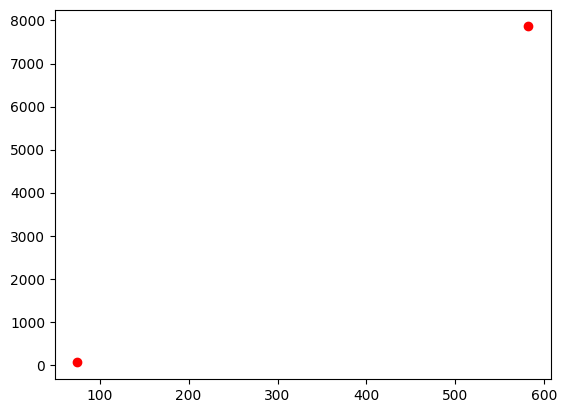

In [96]:
def kMeans(k, data, max_iterations = 100):

    #We need to randomly initialise the means (or centroids) before we can start
    centroids = initialise_centroids(k, data)

    #kMeans doesn't always converge, so we set a maximum number of iterations to stop our code from running forever. 
    for iteration in range(max_iterations):
        #We start by assigning data to clusters
        clusters = assign_data_to_clusters(centroids, data)
        #Next we update our centroids
        centroids = calculate_cluster_means(clusters)

        print(clusters)


    print(clusters)
    #Once finished, let's plot the clusters
    plot_clusters(clusters)

kMeans(3, data)

<h3> Testing k Means</h3>

We haven't provided you with any test functions to check whether your code is correct or not- think about how you can confirm whether your code is doing the right thing or not. 

**Exercise 4** Add test functions for your code. You should think carefully about which functions need testing and how to test them. How could you test the overall functionality of the code?



In [12]:
def test_kmeans():
    pass
    #Your code should go here.

<h3> Scikit-Learn</h3>

**Bonus Exercise 1**

kMeans is a commonly used machine learning algorithm. Although we've implemented it ourselves here, there are many libraries which contain their own (optimised) implementations, and conventionally we'd use one of those libraries rather than writing it ourselves. One such library is scikit-learn, a popular machine learnng library for Python. The documentation for their implementation of kMeans is <a href=https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>here</a>. Try installing (with pip3) scikit-learn and running their version of kMeans. How do the results compare to our implementation?

<h3> Identifying convergence</h3>

**Bonus Exercise 2**

Our implementation of kMeans currently runs for a fixed number of steps (here, 100). However, in many cases, kMeans will converge far quicker than this- in other words, we can get a result quicker if we can stop when the algorithm has converged. 

Here, we define convergence as when we run an iteration of kMeans and no data points are re-assigned to different clusters. 

Implement the function is_converged(old_clusters, new_clusters) which checks for convergence. Once complete, you'll need to modify the kMeans function to stop early if convergence is detected.

In [11]:
def is_converged(old_clusters, new_clusters):
    #Your code goes here.
    return False

<h2> k Nearest Neighbours</h2>

k Nearest Neighbours (kNN) is a *supervised* *classification* algorithm. A classification algorithm tries to identify which of N classes a data point belongs to. For example, given some data on a student's performance in their year 1 assessments, we might want to classify them into those likely to drop out and those likely to complete the course. 

kNN is a *supervised* algorithm, so has access to some data (typically called *training data*) which contains both our *features* and the *true classes*. Given a new data point (typically called *test data*), it then predicts a class for the new point based on the new data point's features. kNN uses a simple heuristic to do this- use the modal value of the k closest points in the data set. 

<img src="https://github.com/engmaths/SEMT10002_2024/blob/main/img/KnnClassification.svg?raw=true" width="40%">

In the image above, the green circle represents a test point. If K=3, then the neighbours would be two red triangles and a blue square, so we would predict that the test point is a red triangle. If however, we used K=5, then we'd have two additional blue squares, so we'd predict that the test point is a blue square.

<h3> Implementing kNN</h3>

The algorithm for implementing kNN is relatively short and sweet. Given a test point, we calculate the Euclidean distance to every point in our training data. We then find the K closest points, returning the  modal value. 

**Exercise 5**

The file heart_data.csv (i.e. the same data as we used for kMeans) also contains a feature that records whether a patient survived or not ("DEATH_EVENT" in the file). For this exercise, you need to implement kNN and use it to predict whether a patient is likely to survive or not. You should base your decision on three features of the data set- *age*, *creatinine_phosphokinase*, and *ejection_fraction*. The data file contains 297 patient records- you should use the first 250 records as your training data and the final 47 as the *test* data. 

Once you have implemented kNN, I'd like you to explore which value of k produces the best predictions. To do this, you should call your function with values of K in the range 1-10, calculating the mean squared error for each value of K. As a reminder, the mean squared error is defined by the formula:

$ MSE = \frac{1}{n} \sum_{i=1}^n(Y_{predicted, i} - Y_{actual, i})^2$

where $Y_{predicted, i}$ is your prediction for the ith test point and $Y_{actual, i} is the actual value for the ith test point (i.e. what the file heart_data.csv actually contains). 

**Submission** This code will be submitted (in pairs) as your fourth consolidation exercise. Both pairs should upload identical code to Blackboard by February 7th. Your code should be submitted as a single file ("kNN.py"). When I run your code, it should create a plot of the mean-squared-error for different values of K (see image below for example). 

Feedback for this assignment will focus on your use of NumPy, your use of functions to organise code, and your adherence to the unit style guide.

